<a href="https://colab.research.google.com/github/Kantesh-Gul/20sw080-DSA-CEP/blob/main/20sw080_ds_cep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [2]:
class colorss:
    yellows=['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404','#a70000','#ff5252','#ff7b7b','#ffbaba']
    greens=['#ffffd4','#fee391','#fec44f','#fe9929','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
cmaps=['flare','icefire','bwr_r','Accent','Spectral','RdGy','afmhot_r','afmhot','inferno','seismic','vlag','vlag_r']

In [3]:
df=pd.read_csv("/content/pesticides.csv")
df=pd.read_csv("/content/rainfall.csv")
df=pd.read_csv("/content/temp.csv")
df=pd.read_csv("/content/yield.csv")
df=pd.read_csv("/content/yield_df.csv")


In [4]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,14120.500000,8152.907488,0.00,7060.2500,14120.50,21180.75,28241.00
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [7]:
df.describe(include='object')

,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


In [8]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [9]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

In [10]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
26293,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
26294,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
26295,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


<Axes: >

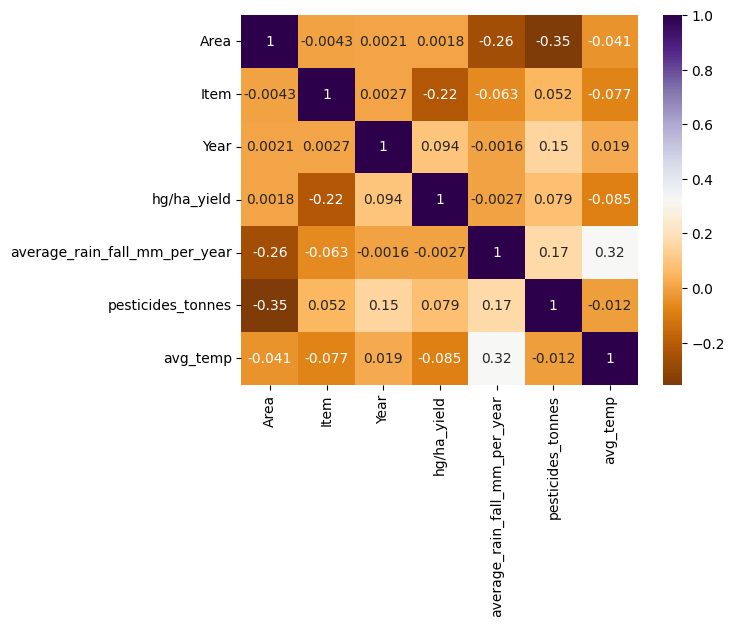

In [11]:
datacorr=df.copy()
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

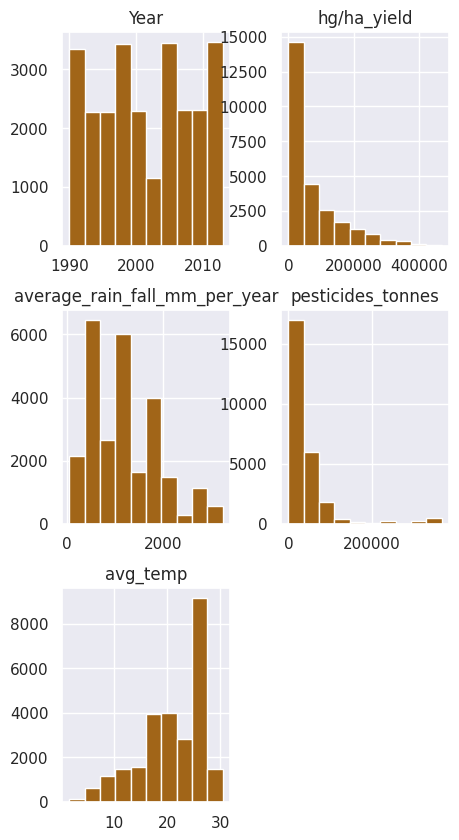

In [12]:
sns.set(palette='BrBG')
df.hist(figsize=(5,10));

In [ ]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')

In [ ]:
df2=df[df['Item']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

In [ ]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data = gpd.read_file(geojson_url)

merged_data = data.merge(df, left_on='NAME', right_on='Area', how='left')
# fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
# plt.title("Countries")
plt.show()

In [ ]:
del merged_data
del data

In [ ]:
palette = sns.color_palette('tab20', 21,as_cmap=True)
num_plots = 7
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))
j=0
for i, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i])]
    for i, area in enumerate(plot_df['Area'].unique()):
       data = plot_df[plot_df['Area'] == area]
       ax.hist(data['hg/ha_yield'], facecolor=palette(i), label=area)

    ax.legend()
    j+=1

plt.show()

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=True)
    display(dg.head())

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=False)
    display(dg.head())

In [ ]:
dk=df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(kind='bar',rot=0,color=colorss.greens)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['pesticides_tonnes'].mean().plot(kind='bar',rot=0,color=colorss.yellows)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby('Area')[['pesticides_tonnes', 'hg/ha_yield']].mean().plot(kind='bar',rot=0,color=colorss.yellows[-6:])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:

px.scatter(df, x='hg/ha_yield', y='pesticides_tonnes',color="Area",color_discrete_sequence=colorss.greens)

In [ ]:
num_plots = 7
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots)
j=0
for i, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i])]

    ax = px.scatter(plot_df, x='hg/ha_yield', y='pesticides_tonnes',color="Area",color_discrete_sequence=colorss.greens)
    j+=1

    ax.show()
plt.clf()


In [ ]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

In [ ]:

a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

In [ ]:
sns.scatterplot(x = 'Item', y = 'avg_temp', data = df,size=10,color='y')
plt.xticks(rotation=90);

In [ ]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]

    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]

    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

In [ ]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item',palette=colorss.yellows)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(18, 22))

sns.scatterplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[0], legend = True,palette='Spectral')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[1], legend = True,palette='Spectral')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[2], legend = True,palette='Spectral')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "Year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[3], legend = True,palette='Spectral')
axes[3].tick_params(axis='x', rotation=45)
axes[3].set_ylabel('Average Yield')
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
def change_of_years(data, template='seaborn'):
    col = data.columns[3:].tolist()
    for i in col:
        sns.lineplot(data.groupby(['Year'])[i].mean(),color='brown')
        plt.title=f'Effect of Years on the {i}'


        plt.show()
        yield()
yplot = change_of_years(df)
next(yplot);


In [ ]:
next(yplot);

In [ ]:
next(yplot);

In [ ]:
df_Egypt = df.loc[df['Area'] == 'Egypt']
yplot = change_of_years(df_Egypt)
next(yplot);

In [ ]:
next(yplot);

In [ ]:
next(yplot);

### ***Model Building and Evalution***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)

### ***Kefold***

In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))

    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    mean_score = np.mean(scores)
    print(f"Mean Score: {mean_score}")
    print('-'*30)


df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = df.style.highlight_max(subset=['Accuracy','R2_score'], color='lightblue').highlight_min(subset=['MSE','MAE','MAPE'], color='lightblue').highlight_max(subset=['MSE','MAE','MAPE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
